# Exercise 1

We first load a dataset and examine its dimensions.

In [ ]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

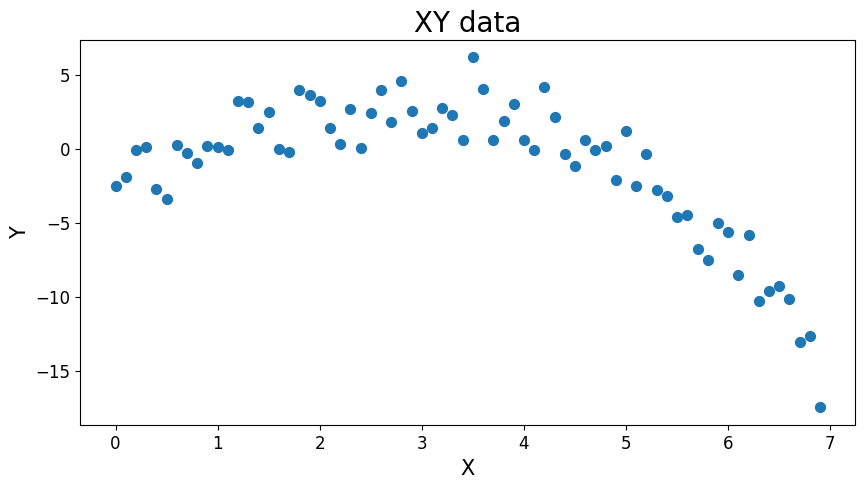

In [117]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
x = xy_data[:,0]  # First column of array (indexed by 0) contains x values
y = xy_data[:,1]  # Second column of array (indexed by 1) contains y values


# Set parameters to make sure figures are large enough. 
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.scatter(x, y, s=50)   # s can be used to adjust the size of the dots
plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY data')
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [135]:
def polyreg(data_matrix, k):
    n = np.shape(data_matrix)[0]        # number of data points
    X = np.zeros((n, k+1))              # design matrix
    
    # Fill design matrix: column i = x^i (0 = x^0, 1 = x^1, ..., k = x^k)
    for i in range(k+1):
        X[:, i] = data_matrix[:,0]**i
    
    y = data_matrix[:,1]                 # vector of y values
    
    # Solve least squares (do NOT reverse)
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    
    fit = X.dot(beta)                    # fitted values
    residuals = y - fit                  # residuals
    
    return beta, residuals, fit
    

Use the tests below to check the outputs of the function you have written:

In [136]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]  #the first output of the function gives the vector of coefficients   
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[1] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

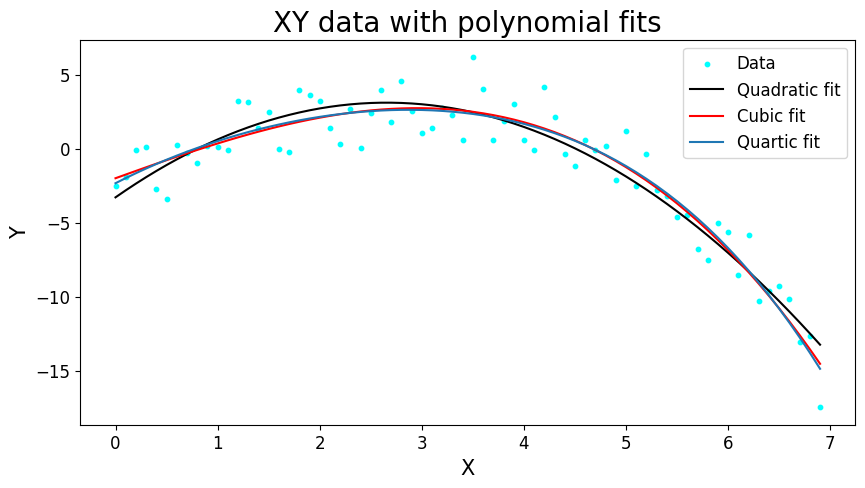

In [138]:
fit_quad = polyreg(xy_data, 2)[2] # Computing the fit of the quadratic model
fit_cube = polyreg(xy_data, 3)[2] # Computing the fit of the cubic model
fit_quart = polyreg(xy_data, 4)[2] # Computing the fit of the quartic model

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.scatter(x, y, s=10, color = 'cyan', label = 'Data')   

plt.plot(x, fit_quad, color = 'black', label = 'Quadratic fit')
plt.plot(x, fit_cube, color = 'red', label = 'Cubic fit')
plt.plot(x, fit_quart, label = 'Quartic fit')
 
plt.xlabel('X')
plt.ylabel('Y')
plt.title('XY data with polynomial fits')
plt.legend(fontsize = 'large')
plt.show()



 #### State which model you choose and briefly justify your choice.
 
 
The accuracy goes up as the degree k increases. Therefore, it is better to use the higher degree of polynomial if possible.
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

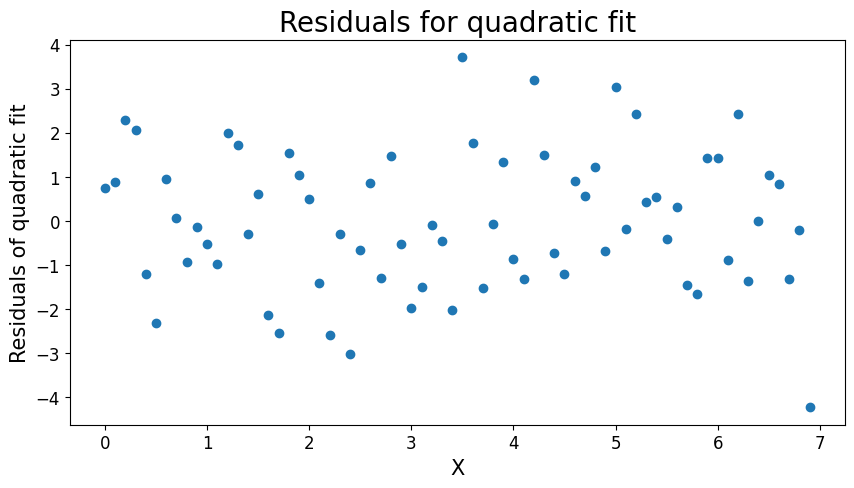

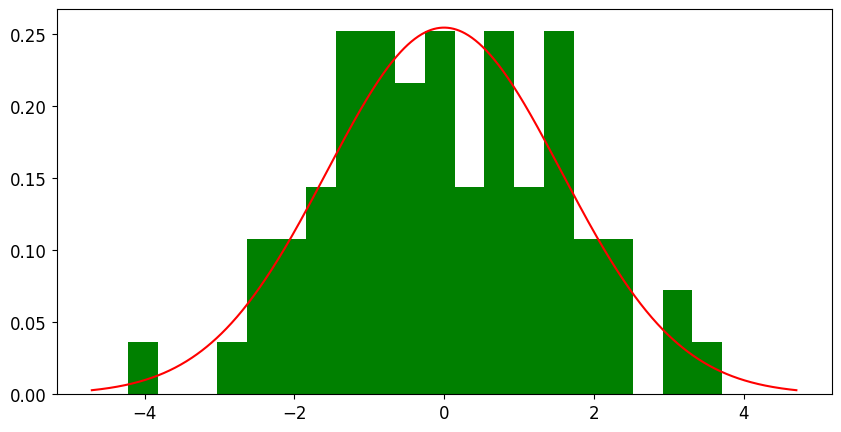

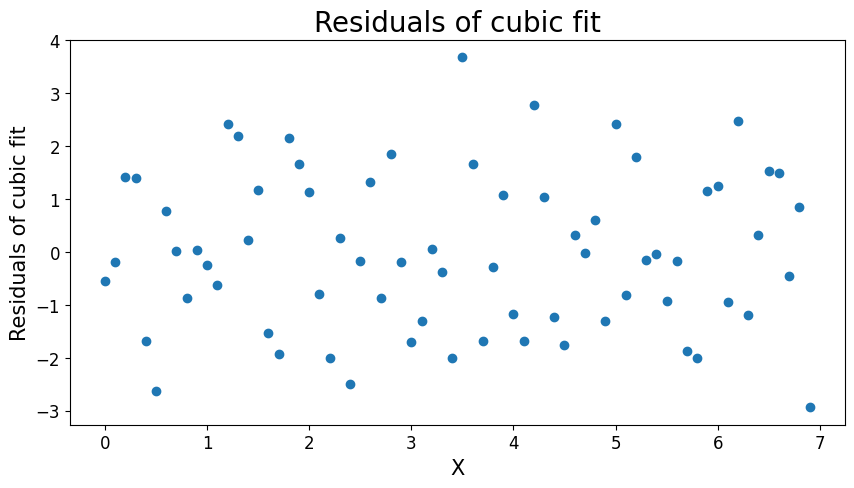

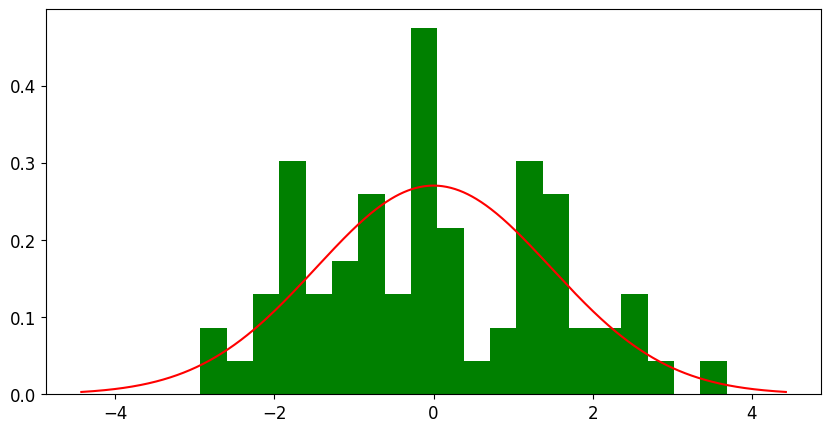

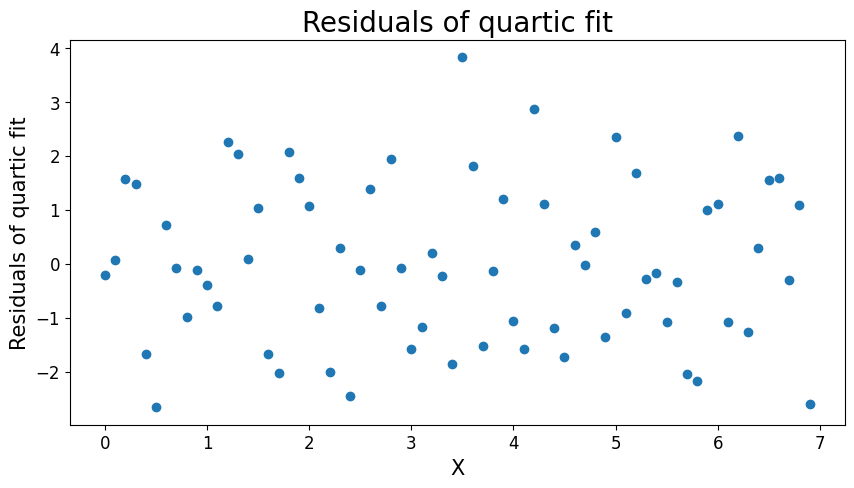

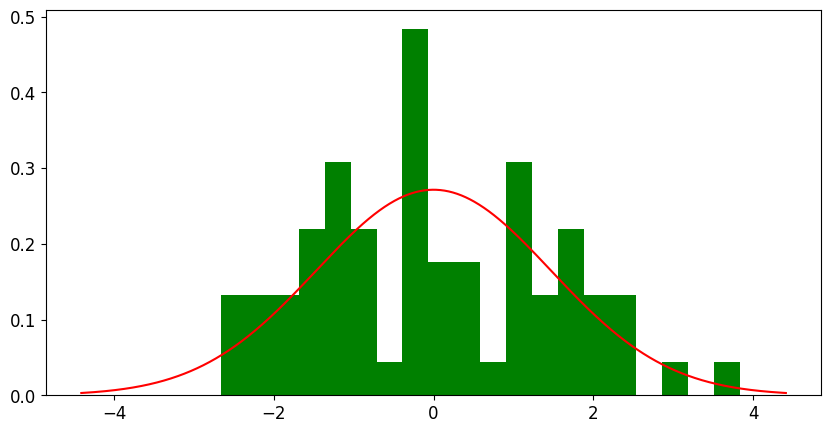

In [147]:
from scipy.stats import norm
#Your code here
#Compute the residuals of quadratic fits
resid_quad = polyreg(xy_data, 2)[1]
resid_cube = polyreg(xy_data, 3)[1]
resid_quart = polyreg(xy_data, 4)[1]

plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('X')
plt.ylabel('Residuals of quadratic fit')
plt.title('Residuals for quadratic fit')
plt.scatter(x, resid_quad)
plt.show()

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_quad, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_stdev = np.std(resid_quad)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()


#Compute the residuals of cubic fits
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('X')
plt.ylabel('Residuals of cubic fit')
plt.title('Residuals of cubic fit')
plt.scatter(x, resid_cube)
plt.show()

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_cube, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_stdev = np.std(resid_cube)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()


#Compute the residuals of quartic fits
plt.rcParams['figure.figsize'] = [10, 5]
plt.xlabel('X')
plt.ylabel('Residuals of quartic fit')
plt.title('Residuals of quartic fit')
plt.scatter(x, resid_quart)
plt.show()

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_quart, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_stdev = np.std(resid_quart)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()
